In [1]:
from src.fistanet.M5FISTANet import FISTANet
from src.fistanet.loader import DataSplit
from src.fistanet.solver import Solver
from os.path import join as pjoin
from torchsummary import summary
from datetime import datetime
import numpy as np
import torch

In [2]:
DATA_DIR = './data'
DATA_FILE_GEN = 'generated/BW_master_10000_2024-04-07-12-43-32.pkl'
DATA_FILE_SIGS = 'steinbrinker/testing_data_mvg_avg.npy'
DATA_FILE_BW = 'mit-bih/bw'
DATA_FILE_GAUSS = 'generated/gaussian_noise.npy'
# DATA_FILE_BPDN = 'generated/BW_alphas-BPDN_10000_2024-04-07-12-43-32.npy'
DATA_FILE_BPDN = 'generated/BW_alphas-BPDN-1iters_10000_2024-04-07-12-43-32.npy'
DICT_FILE_BW = 'steinbrinker/dictionary_BW_real_data.npy'
NOISE_TYPE = 'bw'
if NOISE_TYPE == 'bw':
    DATA_FILE_NOISE = DATA_FILE_BW
elif NOISE_TYPE == 'gauss':
    DATA_FILE_NOISE = DATA_FILE_GAUSS
DATA_SIZE = 10000
BATCH_SIZE = 1000
TVT_SPLIT = {
    'train': 80,
    'valid': 10,
    'test': 10
}

FNET_LAYER_NO = 4
FNET_FEATURE_NO = 16
LAMBDA_SP_LOSS = 1
LAMBDA_SYM_LOSS = 1e-1

EPOCH_NO = 2500
TEST_EPOCH = 10001
LR_DEC_AFTER = 10000
LR_DEC_EVERY = 10
START_EPOCH = 2000
START_RUN = '2024-04-23-20-09-05'
LOG_INTERVAL = 4
LEARNING_RATE = 1e-3



# DATA_FILE_GEN = 'generated/BW_master_7999-8000_2024-04-07-12-43-32.pkl'
# DATA_SIZE = 2
# BATCH_SIZE = 1
# TVT_SPLIT = {
#     'train': 50,
#     'valid': 50,
#     'test': 0
# }
# FNET_LAYER_NO = 4
# FNET_FEATURE_NO = 16
# LEARNING_RATE = 1e-3
# LAMBDA_SP_LOSS = 0.5

In [3]:
trn_ldr, val_ldr, tst_ldr = DataSplit(DATA_DIR, NOISE_TYPE, DATA_FILE_GEN, DATA_FILE_SIGS, DATA_FILE_NOISE, DATA_FILE_BPDN, TVT_SPLIT, BATCH_SIZE)

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
Psi = np.load(pjoin(DATA_DIR, DICT_FILE_BW))
Psi = torch.from_numpy(Psi)
Psi = Psi.clone().detach().to(device=device)

In [6]:
fista_net = FISTANet(FNET_LAYER_NO, FNET_FEATURE_NO)
fista_net = fista_net.to(device)# define arguments of fista_net


In [7]:
# summary(fista_net, input_size=(1, 64, 298), device=str(device))
print('Total number of parameters fista net:',
          sum(p.numel() for p in fista_net.parameters()))

Total number of parameters fista net: 18871


In [8]:
dt = datetime.now().strftime('%Y-%m-%d-%H-%M-%S')
if START_EPOCH:
    dt = START_RUN
args = {
    'model_name': 'FISTANet',
    'num_epochs': EPOCH_NO,
    'lr': LEARNING_RATE,
    'data_dir': DATA_DIR,
    'save_path': f'./runs/{dt}',
    'start_epoch': START_EPOCH,
    'start_run': START_RUN,
    'multi_gpu': False,
    'device': device,
    'log_interval': LOG_INTERVAL,
    'test_epoch': TEST_EPOCH,
    'lr_dec_after': LR_DEC_AFTER,
    'lr_dec_every': LR_DEC_EVERY,
    'lambda_sp_loss': LAMBDA_SP_LOSS,
    'lambda_sym_loss': LAMBDA_SYM_LOSS
}

In [9]:
solver = Solver(fista_net, Psi, trn_ldr, val_ldr, BATCH_SIZE, args, tst_ldr)

Training epoch 2001...

Train Epoch: 2001 [0/8000 (0%)]	Batch Loss: 0.020926	Learning Rate (w_theta): 0.001000	 TIME:2.5s
				Disc: 0.015068		Sym: 0.000719		Spars: 0.005139
	 TVw: -0.569591 | TVb: -1.975530 | GSw: -0.407429 | GSb: -0.116712 | TSUw: 0.277423 | TSUb: 0.182713

Train Epoch: 2001 [4000/8000 (50%)]	Batch Loss: 0.020287	Learning Rate (w_theta): 0.001000	 TIME:4.1s
				Disc: 0.014451		Sym: 0.000690		Spars: 0.005145
	 TVw: -0.569636 | TVb: -1.975549 | GSw: -0.407490 | GSb: -0.116794 | TSUw: 0.277345 | TSUb: 0.182731
Validating epoch 2001...
-------------------------------------------
Epoch statistics:
Average training loss: 0.020150147874561875
Average validation loss: 0.01958809211242233
Training epoch 2002...

Train Epoch: 2002 [0/8000 (0%)]	Batch Loss: 0.019837	Learning Rate (w_theta): 0.001000	 TIME:6.3s
				Disc: 0.014033		Sym: 0.000670		Spars: 0.005134
	 TVw: -0.569685 | TVb: -1.975568 | GSw: -0.407549 | GSb: -0.116875 | TSUw: 0.277269 | TSUb: 0.182747

Train Epoch: 2002

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\galiger.gergo\AppData\Local\Temp\ipykernel_14380\3719546261.py", line 1, in <module>
    solver.train()
  File "C:\Users\galiger.gergo\Desktop\ecg-denoising\workspace\src\fistanet\solver.py", line 359, in train
    plot_loss_curves(self.all_avg_train_losses, self.all_avg_val_losses, self.save_path, 'train_val_losses_ep0.png')
  File "C:\Users\galiger.gergo\Desktop\ecg-denoising\workspace\src\fistanet\solver.py", line 34, in plot_loss_curves
    plt.savefig(pjoin(save_path, 'plots', 'losses', file_name))
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py", line 979, in savefig
    res = fig.savefig(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py", line 3046, in savefig
    self.canvas.print_figure(fname, **kwargs)


TypeError: object of type 'NoneType' has no len()

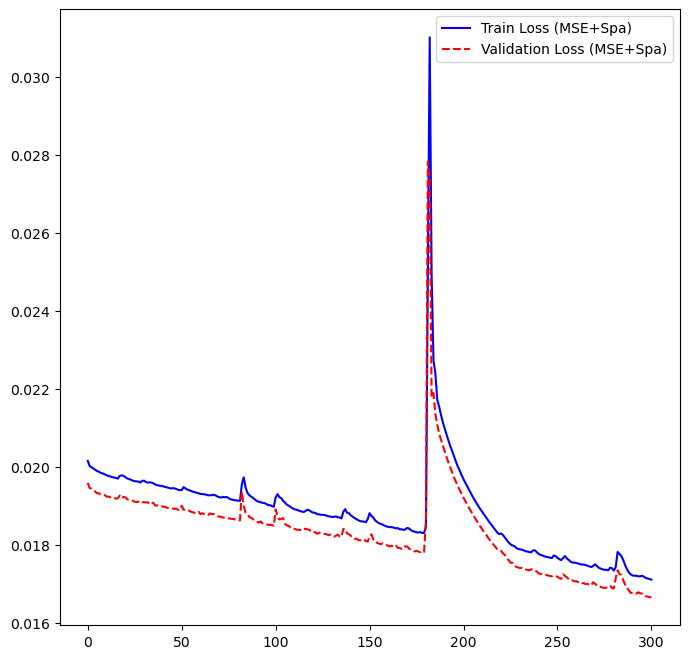

In [9]:
solver.train()